In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, make_scorer 

In [3]:
raw_data = []
with open('chronic_kidney_disease_full.arff', "r") as f:
    for line in f:
        line = line.replace('\n', '')
        raw_data.append(line.split(','))


names = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
         'bgr', 'bu',  'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
         'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
         'class', 'no_name']
    
df = pd.DataFrame(raw_data[145:], columns=names)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class,no_name
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,7800,5.2,yes,yes,no,good,no,no,ckd,None
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,6000,?,no,no,no,good,no,no,ckd,None
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,7500,?,no,yes,no,poor,no,yes,ckd,None
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,6700,3.9,yes,no,no,poor,yes,yes,ckd,None
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,7300,4.6,no,no,no,good,no,no,ckd,None


In [4]:
df.shape

(402, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   age      402 non-null    object
 1   bp       400 non-null    object
 2   sg       400 non-null    object
 3   al       400 non-null    object
 4   su       400 non-null    object
 5   rbc      400 non-null    object
 6   pc       400 non-null    object
 7   pcc      400 non-null    object
 8   ba       400 non-null    object
 9   bgr      400 non-null    object
 10  bu       400 non-null    object
 11  sc       400 non-null    object
 12  sod      400 non-null    object
 13  pot      400 non-null    object
 14  hemo     400 non-null    object
 15  pcv      400 non-null    object
 16  wbcc     400 non-null    object
 17  rbcc     400 non-null    object
 18  htn      400 non-null    object
 19  dm       400 non-null    object
 20  cad      400 non-null    object
 21  appet    400 non-null    object
 22  pe

In [6]:
data = df.drop('no_name', axis = 1)
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
data.dtypes

age      object
bp       object
sg       object
al       object
su       object
rbc      object
pc       object
pcc      object
ba       object
bgr      object
bu       object
sc       object
sod      object
pot      object
hemo     object
pcv      object
wbcc     object
rbcc     object
htn      object
dm       object
cad      object
appet    object
pe       object
ane      object
class    object
dtype: object

In [8]:
data = data.applymap(lambda row: np.nan if row == '?' else row)
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,NaN,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [9]:
data.values

array([['48', '80', '1.020', ..., 'no', 'no', 'ckd'],
       ['7', '50', '1.020', ..., 'no', 'no', 'ckd'],
       ['62', '80', '1.010', ..., 'no', 'yes', 'ckd'],
       ...,
       ['58', '80', '1.025', ..., 'no', 'no', 'notckd'],
       ['', None, None, ..., None, None, None],
       ['', None, None, ..., None, None, None]], dtype=object)

In [10]:
data = data.applymap(lambda row: np.nan if row == None else row)

In [11]:
data.isna().sum()

age        9
bp        14
sg        49
al        48
su        51
rbc      154
pc        67
pcc        6
ba         6
bgr       46
bu        21
sc        19
sod       89
pot       90
hemo      54
pcv       72
wbcc     107
rbcc     132
htn        4
dm         4
cad        4
appet      3
pe         3
ane        3
class      2
dtype: int64

In [12]:
data = data.dropna()

In [13]:
data.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [14]:
data = data.astype({'age' : 'int', 'bp' : 'int', 'al' : 'int', 'su' : 'int', 'bgr' : 'int', 'bu' : 'int', 'sod' : 'int', 'pcv' : 'int', 'wbcc' : 'int'})

In [15]:
data = data.astype({'sg' : 'float', 'sc' : 'float', 'pot' : 'float', 'hemo' : 'float', 'rbcc' : 'float'})

In [16]:
data.dtypes

age        int64
bp         int64
sg       float64
al         int64
su         int64
rbc       object
pc        object
pcc       object
ba        object
bgr        int64
bu         int64
sc       float64
sod        int64
pot      float64
hemo     float64
pcv        int64
wbcc       int64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

In [17]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,380,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,68,80,1.010,3,2,normal,abnormal,present,present,157,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd


In [18]:
data.reset_index()

,index,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,3,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
1,9,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
2,11,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
3,14,68,80,1.010,3,2,normal,abnormal,present,present,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
4,20,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,395,55,80,1.020,0,0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
154,396,42,70,1.025,0,0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
155,397,12,80,1.020,0,0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
156,398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [19]:
data.shape

(158, 25)

In [20]:
data.corr()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
age,1.000000,0.079712,-0.277303,0.253380,0.207711,0.301915,0.190636,0.189721,-0.102933,0.006866,-0.245645,-0.235116,0.153132,-0.242235
bp,0.079712,1.000000,-0.198897,0.322507,0.243828,0.190113,0.316287,0.386551,-0.224710,0.127801,-0.282365,-0.353504,0.008274,-0.228533
sg,-0.277303,-0.198897,1.000000,-0.712331,-0.448477,-0.544781,-0.545319,-0.563122,0.539285,-0.075057,0.682086,0.678472,-0.288930,0.619092
al,0.253380,0.322507,-0.712331,1.000000,0.521448,0.518123,0.661940,0.702889,-0.599334,0.209492,-0.784745,-0.775528,0.314574,-0.640099
su,0.207711,0.243828,-0.448477,0.521448,1.000000,0.730050,0.312259,0.347196,-0.242491,0.271954,-0.385511,-0.404821,0.201000,-0.377726
bgr,0.301915,0.190113,-0.544781,0.518123,0.730050,1.000000,0.326496,0.331284,-0.284968,0.102226,-0.434158,-0.443818,0.212093,-0.418085
bu,0.190636,0.316287,-0.545319,0.661940,0.312259,0.326496,1.000000,0.896094,-0.492778,0.245427,-0.712196,-0.706582,0.128961,-0.621456
sc,0.189721,0.386551,-0.563122,0.702889,0.347196,0.331284,0.896094,1.000000,-0.532575,0.141896,-0.723937,-0.726187,0.123953,-0.639021
sod,-0.102933,-0.224710,0.539285,-0.599334,-0.242491,-0.284968,-0.492778,-0.532575,1.000000,-0.051037,0.583001,0.570045,-0.176238,0.465125
pot,0.006866,0.127801,-0.075057,0.209492,0.271954,0.102226,0.245427,0.141896,-0.051037,1.000000,-0.192100,-0.213488,-0.107559,-0.193783


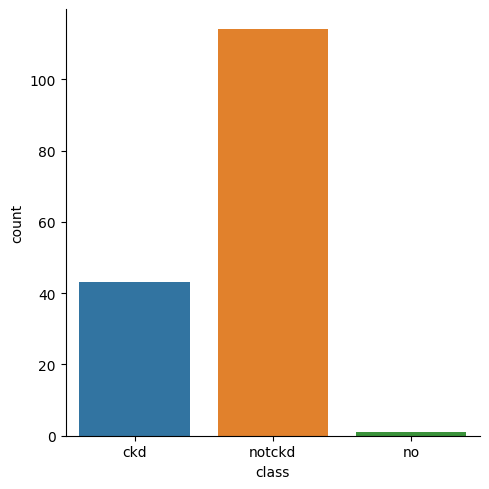

In [21]:
sns.catplot(x = 'class', data = data, kind = 'count')

In [22]:
sns.set()
fig, ax = plt.subplots(figsize=(25, 25))
ax = sns.heatmap(data.corr(), annot = True, square = True, fmt = '.2f', annot_kws={"size": 16}, linewidths = 0.5)
ax.xaxis.set_tick_params(labelsize = 18)
ax.yaxis.set_tick_params(labelsize = 18)

In [23]:
sns.pairplot(data, hue = 'class')

In [24]:
X = pd.get_dummies(data.drop('class', axis = 1), drop_first = True)
y = data['class']

In [25]:
print(X.shape)
print(y.shape)

(158, 27)
(158,)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

In [27]:
scaler = StandardScaler()

In [28]:
X_train_scaled = scaler.fit_transform(X_train)

In [29]:
X_test_scaled = scaler.transform(X_test)

In [30]:
pca = PCA()

In [31]:
pca.fit_transform(X_train_scaled)

array([[-2.27652441e+00, -4.66927564e-01, -2.03184101e-01, ...,
        -1.87774299e-01,  5.84490222e-16, -1.85688333e-16],
       [-1.53481727e+00,  2.30083913e-01, -5.53120925e-01, ...,
        -1.44293989e-01, -2.56327399e-15,  3.63353446e-16],
       [-1.97479648e+00, -3.57530267e-01,  5.38420074e-02, ...,
        -5.51295353e-02,  8.90989868e-15, -1.37564828e-16],
       ...,
       [-2.59706388e+00, -3.37239182e-01,  1.81741726e-01, ...,
         7.05077236e-04, -1.22647886e-15,  2.87393421e-17],
       [-2.10964027e+00,  9.49204796e-01, -7.38867125e-01, ...,
        -1.61016039e-01,  7.93782759e-16, -1.12503758e-16],
       [-2.27837573e+00, -2.88058307e-01, -1.05221040e-01, ...,
        -3.68617109e-02, -5.80682906e-16, -1.69803248e-17]])

In [32]:
features =  np.arange(pca.n_components_)

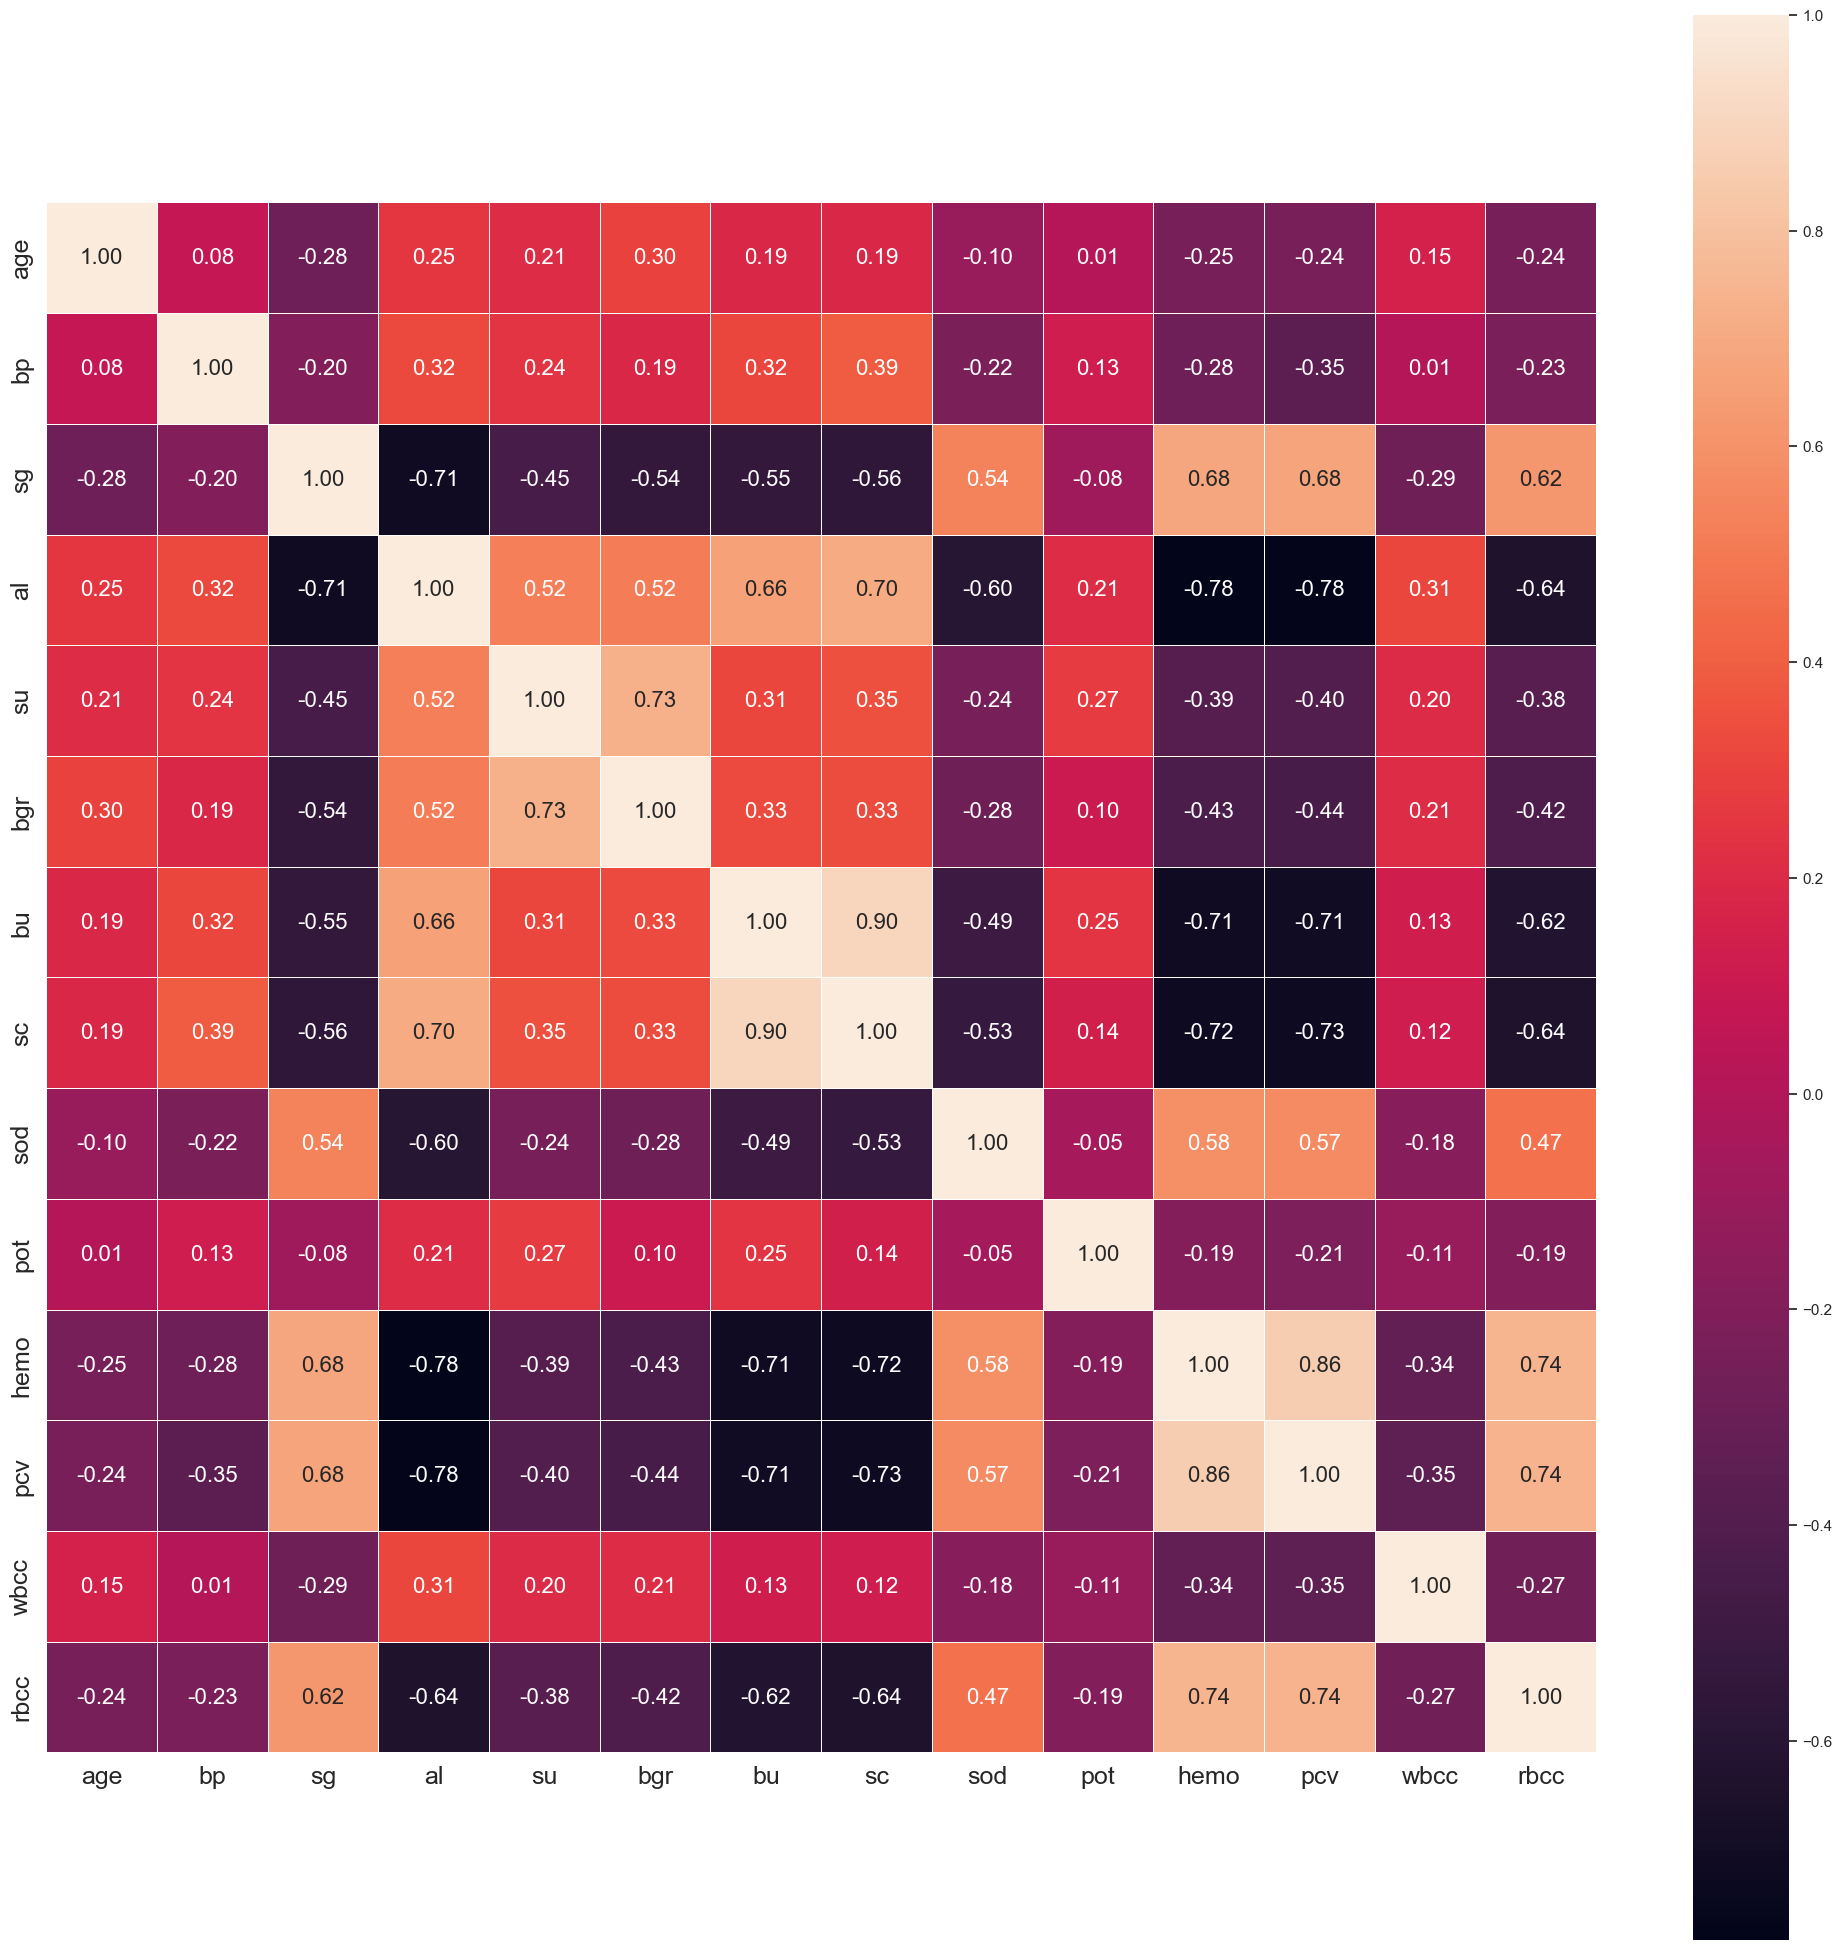

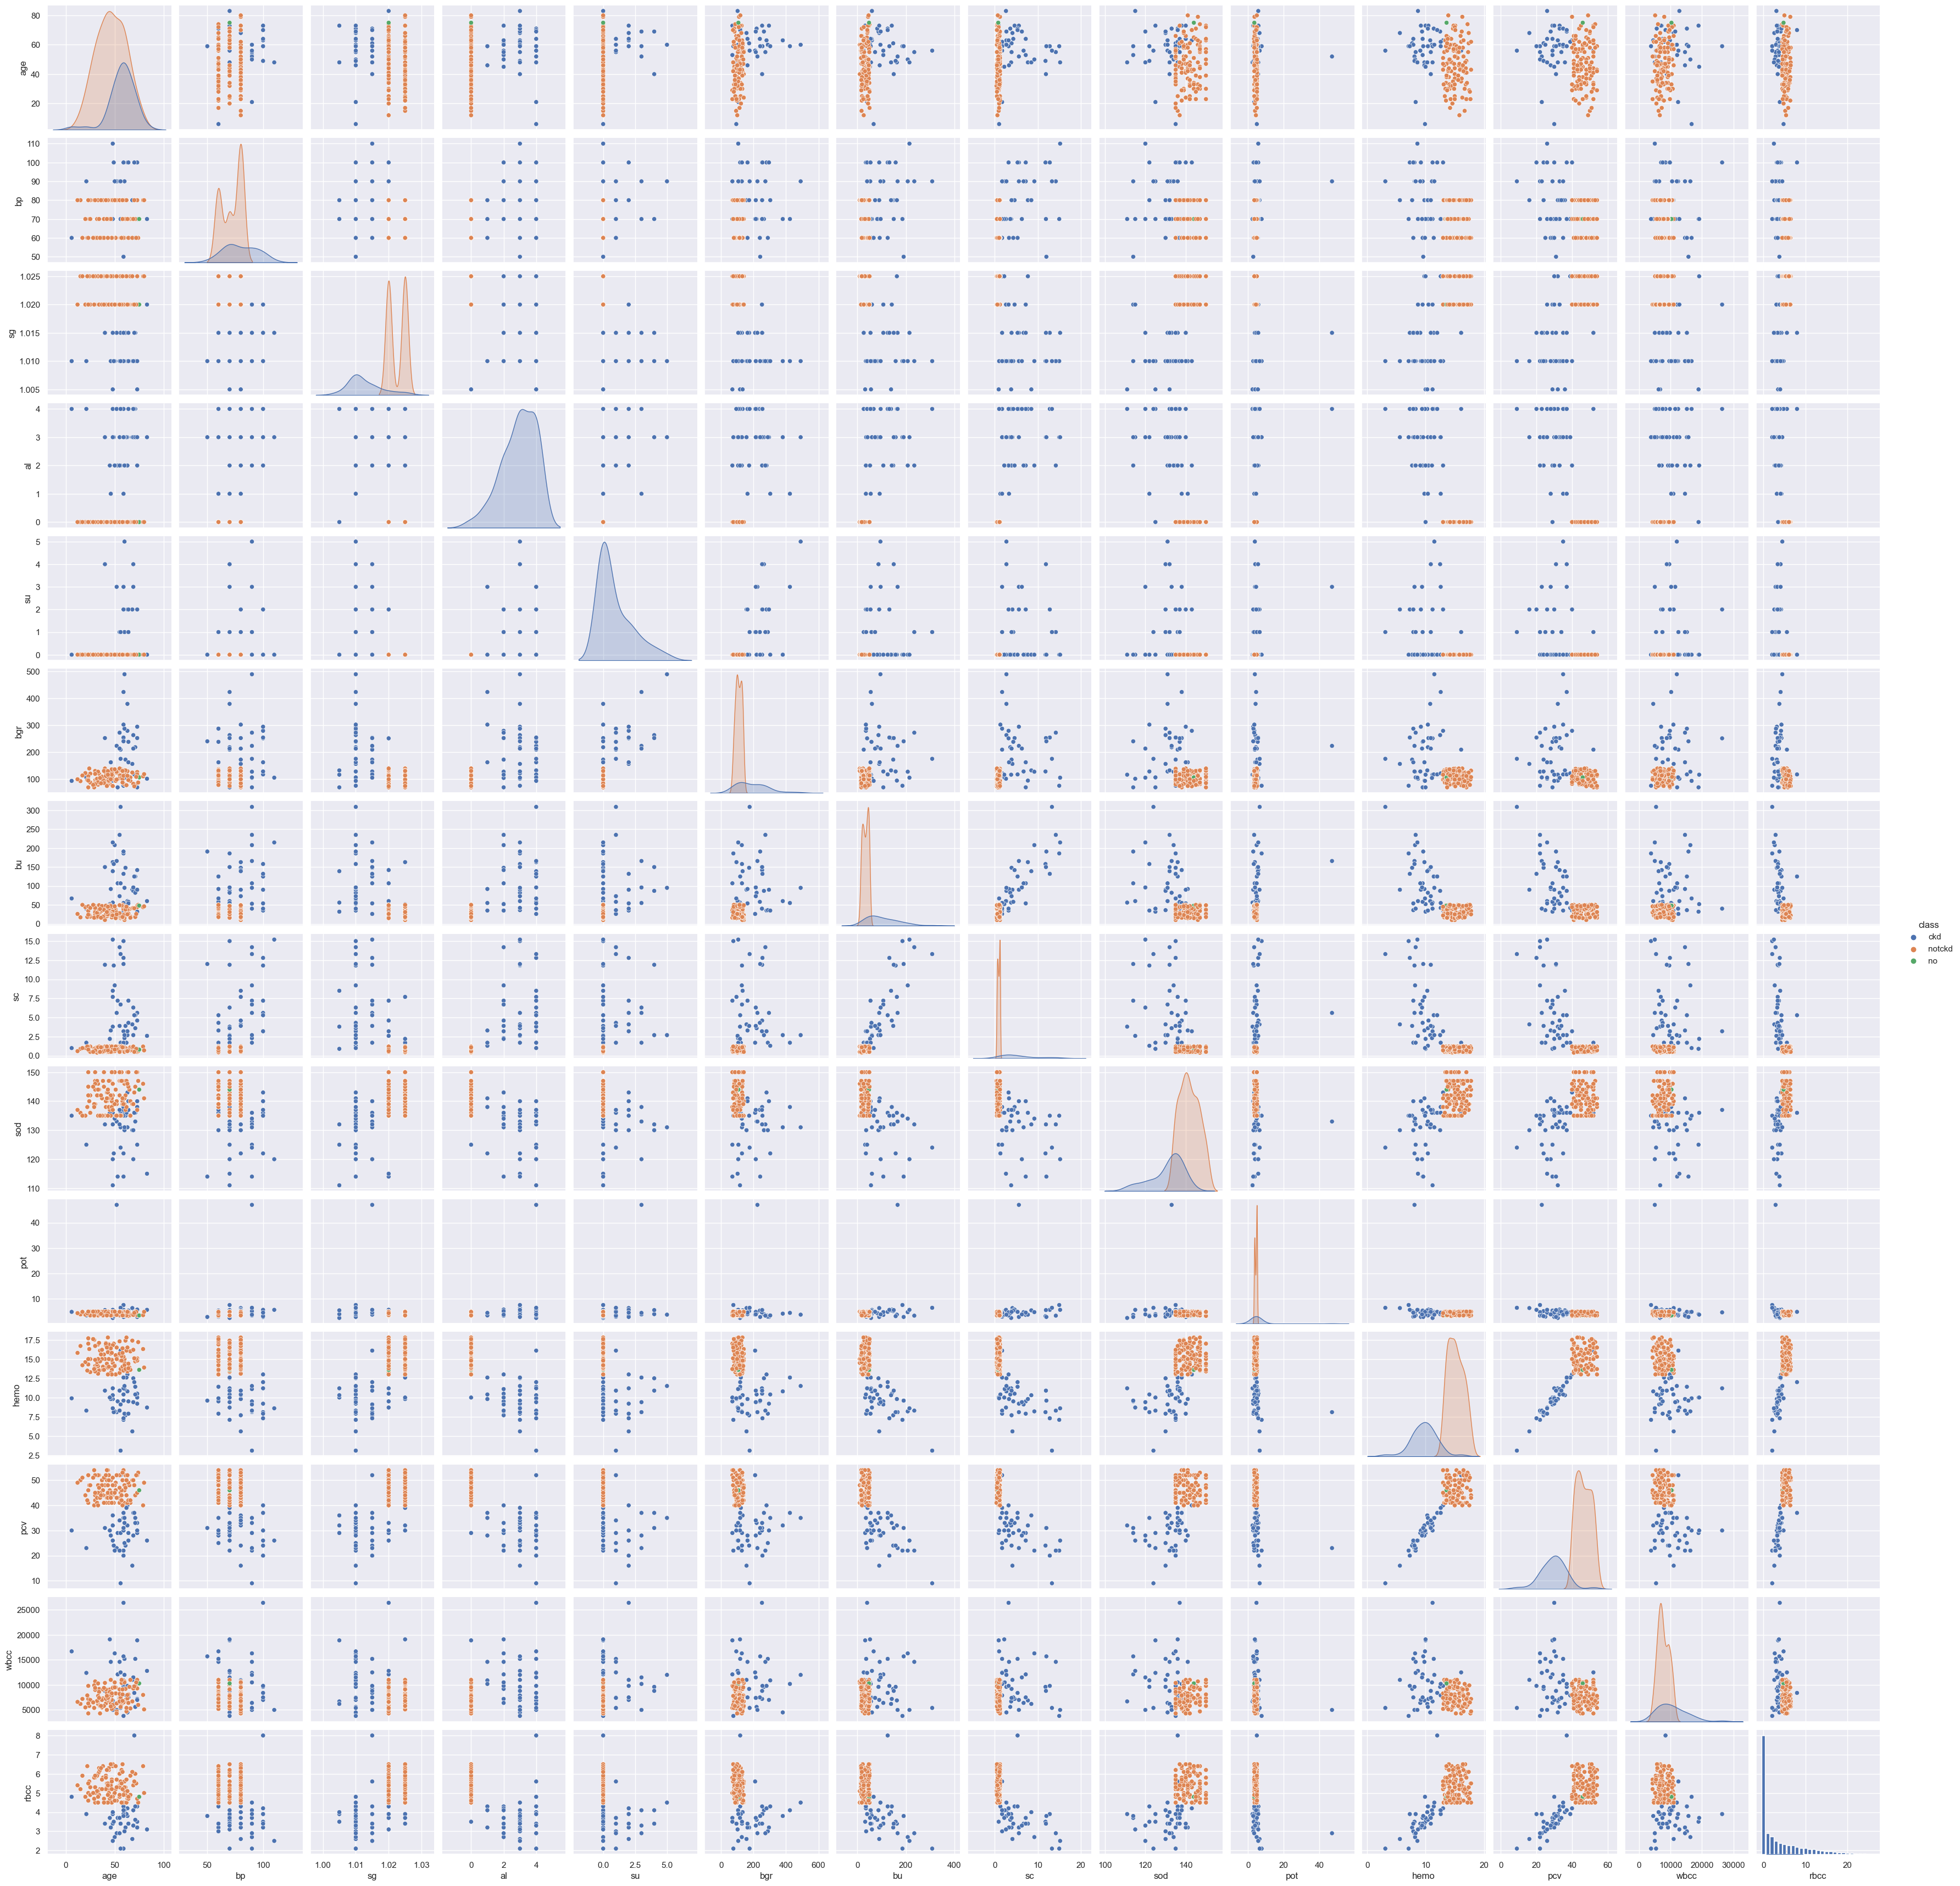

In [33]:
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA Features')
plt.ylabel('Variance')
plt.show()

In [34]:
rf_cl = RandomForestClassifier(random_state = 22)
params = {'n_estimators' : [25, 50, 75, 100], 'max_depth' : [4, 6, 8, 10]}
AUC = make_scorer(roc_auc_score)
rf_cv = GridSearchCV(rf_cl, param_grid = params, cv = 5, scoring = AUC)
rf_cv.fit(X, y)
print(rf_cv.cv_results_)
print(rf_cv.best_params_)
print(rf_cv.best_score_)
print(rf_cv.best_estimator_)

{'mean_fit_time': array([0.02796044, 0.05327621, 0.08020787, 0.10846348, 0.02774749,
       0.05274487, 0.07826996, 0.10498743, 0.02749209, 0.05321293,
       0.07849813, 0.10371246, 0.02732968, 0.05251632, 0.07808504,
       0.10414767]), 'std_fit_time': array([0.00050619, 0.00011681, 0.00284877, 0.00471889, 0.00030894,
       0.00024257, 0.00029859, 0.00172064, 0.0003168 , 0.00104652,
       0.001201  , 0.00150706, 0.00021417, 0.0002068 , 0.00028134,
       0.00073469]), 'mean_score_time': array([0.00368767, 0.00540023, 0.00733156, 0.00927234, 0.00349226,
       0.00528655, 0.00722456, 0.00932255, 0.00342927, 0.00534325,
       0.00730109, 0.00907307, 0.00340276, 0.00533881, 0.00733991,
       0.00950255]), 'std_score_time': array([4.23916451e-04, 7.21017203e-05, 2.13405933e-04, 1.65346267e-04,
       9.31355379e-05, 3.83035902e-05, 5.37414728e-05, 4.84523352e-04,
       3.55602250e-05, 9.95395027e-05, 2.42453526e-04, 1.67357643e-04,
       3.08146767e-05, 1.72515611e-04, 3.33608049e

In [35]:
rf_cl.n_estimators = 50
rf_cl.max_depth = 4
rf_cl.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=50, random_state=22)

In [36]:
y_pred_rf = rf_cl.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[10  0]
 [ 0 22]]
              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        10
      notckd       1.00      1.00      1.00        22

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



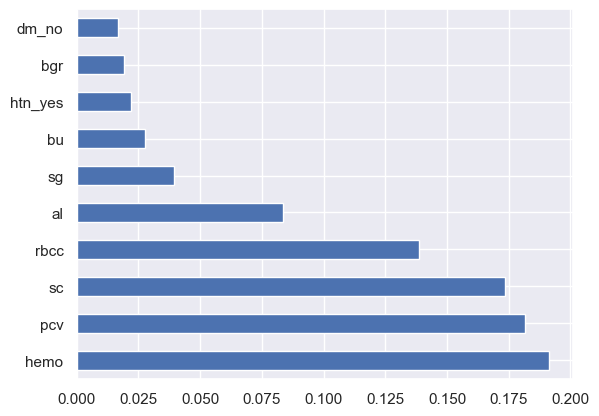

In [37]:
ranked_features = pd.Series(rf_cl.feature_importances_, index = X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

In [38]:
xgb_cl = xgb.XGBClassifier(seed = 22)
params_xgb = {'objective': ['reg:logistic', 'binary:logistic'], 'n_estimators' : [25, 50, 75, 100], 'max_depth' : [4, 6, 8, 10], 'alpha' : [0.01, 0.03, 0.1]}
xgb_cv = GridSearchCV(estimator = xgb_cl, param_grid = params_xgb, cv = 5)
xgb_cv.fit(X, pd.get_dummies(y, drop_first = True))
print(xgb_cv.best_params_)
print(xgb_cv.best_score_)
print(xgb_cv.best_estimator_)

{'alpha': 0.01, 'max_depth': 4, 'n_estimators': 25, 'objective': 'reg:logistic'}
0.9622983870967742
XGBClassifier(alpha=0.01, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=25, n_jobs=0,
              num_parallel_tree=1, objective='reg:logistic', predictor='auto',
              random_state=22, ...)


In [39]:
rfe = RFE(estimator = LogisticRegression(), n_features_to_select = 10, verbose = 1)

In [40]:
rfe.fit(X_train_scaled, y_train)

Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.


RFE(estimator=LogisticRegression(), n_features_to_select=10, verbose=1)

In [41]:
y_pred_rfe = rfe.predict(X_test_scaled)

In [42]:
print(dict(zip(X.columns, rfe.ranking_)))

{'age': 7, 'bp': 10, 'sg': 1, 'al': 1, 'su': 12, 'bgr': 8, 'bu': 4, 'sc': 3, 'sod': 2, 'pot': 17, 'hemo': 1, 'pcv': 1, 'wbcc': 1, 'rbcc': 11, 'rbc_normal': 1, 'pc_normal': 1, 'pcc_present': 6, 'ba_present': 16, 'htn_yes': 1, 'dm_no': 1, 'dm_yes': 5, 'cad_yes': 18, 'appet_no': 1, 'appet_poor': 14, 'pe_no': 9, 'pe_yes': 15, 'ane_yes': 13}


In [43]:
print(confusion_matrix(y_test, y_pred_rfe))
print(classification_report(y_test, y_pred_rfe))

[[10  0]
 [ 0 22]]
              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        10
      notckd       1.00      1.00      1.00        22

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [44]:
svm = SVC()

In [45]:
svm.fit(X_train_scaled, y_train)

SVC()

In [46]:
y_pred_svm = svm.predict(X_test_scaled)

In [47]:
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

[[10  0]
 [ 0 22]]
              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        10
      notckd       1.00      1.00      1.00        22

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

